In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import seaborn as sns

In [12]:
conditions_list = ['wt', 'gltA', 'accA', 'ftsZ']

In [13]:
for i in conditions_list:
    df = pd.concat([pd.read_excel('../data/Metabolomics.xlsx', sheet_name=i) for i in conditions_list])

In [14]:
df.head()

,Strain,Sample Name,Component Name,"Concentration, umol/gCDW",Replicate,Timepoint
0,SEM 1.3,sem-1c 0,arg-L.arg-L_1.Light,0.170101,1,1
1,SEM 1.3,sem-1c 0,orn.orn_1.Light,31.919192,1,1
2,SEM 1.3,sem-1c 0,his-L.his-L_1.Light,0.191515,1,1
3,SEM 1.3,sem-1c 0,asn-L.asn-L_1.Light,0.023919,1,1
4,SEM 1.3,sem-1c 0,ser-L.ser-L_1.Light,0.839293,1,1


In [15]:
# replace negative concentrations with 0
df['Concentration, umol/gCDW'] = df['Concentration, umol/gCDW'].apply(lambda x: x if x > 0 else 0)
df['Component Name'] = df['Component Name'].str.split('.',expand=True,)[0]
df['ID'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str) +' Rep '+df['Replicate'].astype(str)
df['Sample'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str)
# remove all 0 values
df = df[df['Concentration, umol/gCDW'] != 0]
# meadian value across replicates
df = df[['Component Name','Concentration, umol/gCDW','Sample']].groupby(['Sample','Component Name']).median().reset_index()
df = df.pivot(columns = 'Component Name', values = 'Concentration, umol/gCDW', index = 'Sample').transpose()
# drop metabolites which are less that 90% of replicates are not NA and fill the rest of NA with 0
df = df.dropna(thresh=26)
df = df.fillna(0)

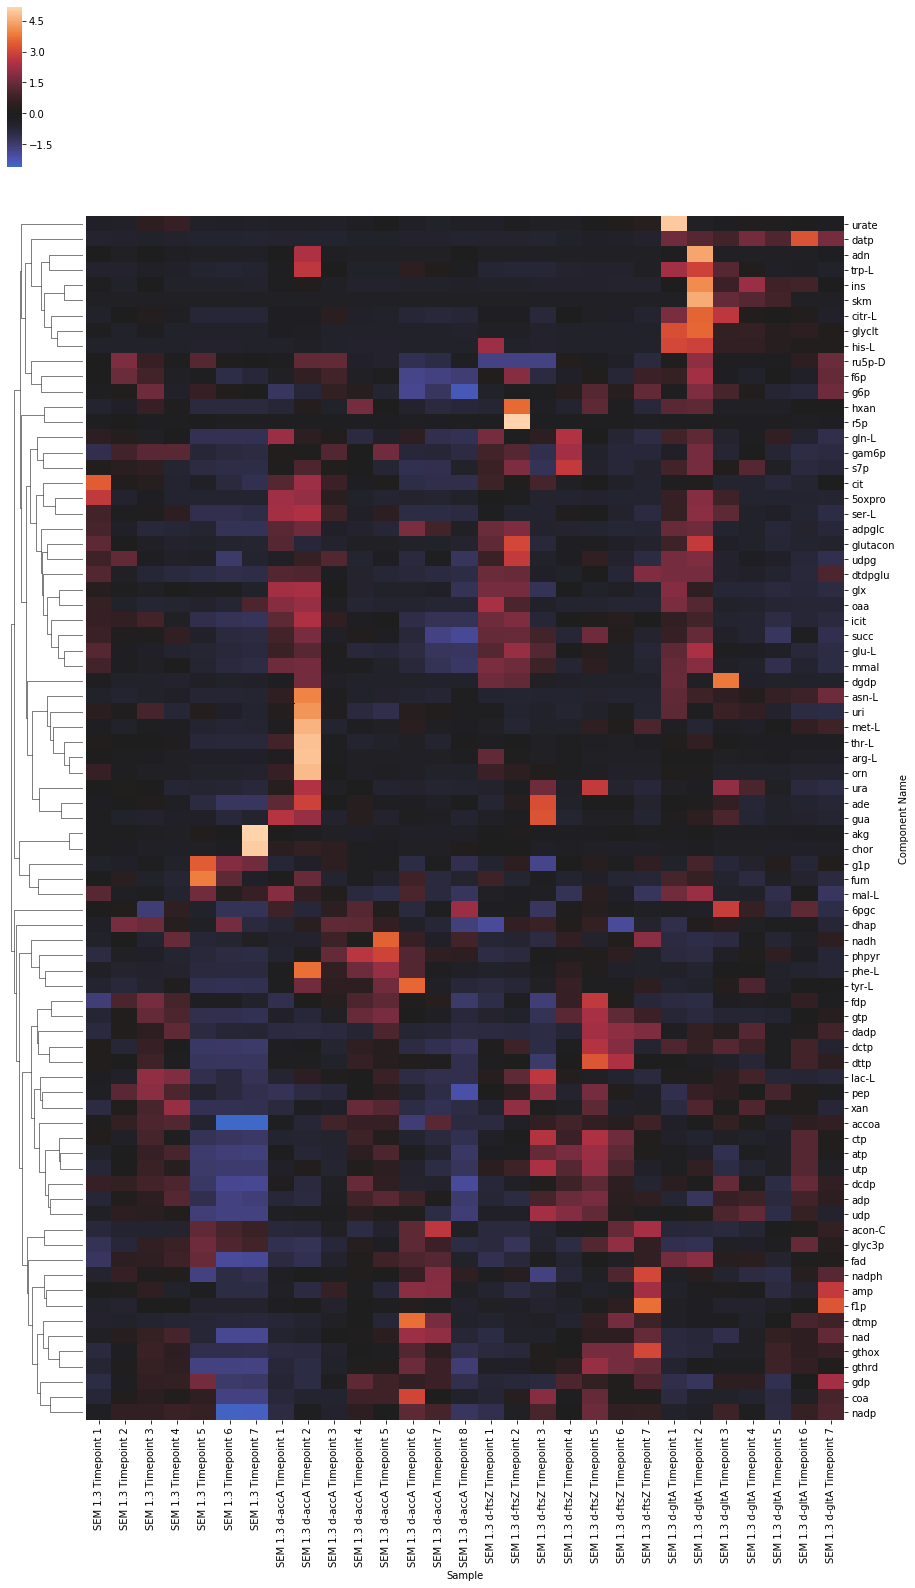

In [17]:
n = (df.transpose() - df.transpose().mean())/ df.transpose().std()
a = sns.clustermap(n.transpose(),col_cluster=False,figsize=(15,26),center=0)
a.savefig("../figures/metabolomics_heatmap.svg")